In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

LOADING THE DATASET

In [2]:
npz = np.load('Social_Network_Ads_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Social_Network_Ads_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [3]:
test_inputs.shape

(58, 3)

In [4]:
test_targets.shape

(58,)

In [5]:
train_inputs.shape

(228, 3)

In [6]:
train_targets.shape

(228,)

In [7]:
## Random Forest with sklearn

In [20]:
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(train_inputs,train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
classifier.score(test_inputs,test_targets)

0.896551724137931

CONFUSION MATRIX

In [10]:
# Predicting the test set results

Y_Pred = classifier.predict(test_inputs)

# Making the Confusion Matrix 

In [11]:
Y_Pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [12]:
test_targets

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [13]:
#y_pred = model.predict(test_inputs)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_targets, Y_Pred)
cm

array([[20,  4],
       [ 2, 32]], dtype=int64)

MAKING A DATAFRAME FOR THE CONFUSION MATRIX

In [14]:
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,20,4
Actual 1,2,32


TO VISUALIZE THE CONFUSION MATRIX

Text(30.5, 0.5, 'Truth')

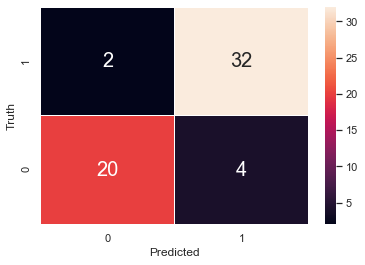

In [15]:
#plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,annot_kws={'size':20}, linewidths=.5)
#plt.xlim(-1, 10)
plt.ylim(0, 2)
plt.xlabel("Predicted")
plt.ylabel("Truth")